# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
import pandas as pd
# read the data using the pandas dataframe 
df = pd.read_csv('/content/drive/MyDrive/DS/foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns present.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

1.   info() returns pandas dataframe and has total of 9 columns . 
2.   It is observed there is 1 column with float64 dataype, 4 columns with int64 and 4 columns with object Data type. 
3.   In total, info() uses memory usage of 133.6 KB
4.   There are 4 columns( Column, Non-Null, Count, Dtype) with 9 rows. 





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# To find the missing values in the data

df.isnull().sum().sum()

0

#### Observations: 


1.   It is observed there are no missing values in the dataset.




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

1.   The average time for the food preparation is 27 minutes .
2.   The minimum value for the food preparing time is 20 minutes.
3.   The maximum value for the food preparing time is 35 minutes.
4.   It is observed that mean is almost equal to the median 
     of the data for the  food preparation time.  
5.   It is observed overall the distribution is symmetric.




### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
order_not_rated = df.loc[df["rating"].isin(['Not given'])].value_counts()
print (len(order_not_rated))

736


#### Observations:



1.   Total number of orders which donot have any rating with rating status as 'Not given' are 736 .





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

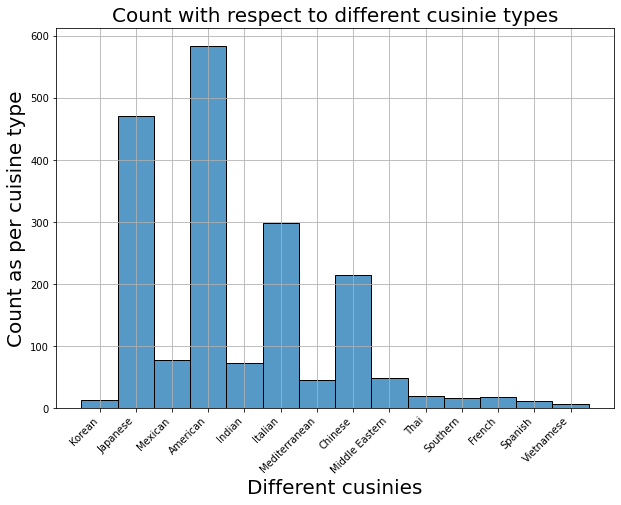

In [10]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,7))

# Below is the histplot used with seaborn library on the X-axis as 'cuisine_type' and dataframe 'df'

data_histplot = sns.histplot(data=df,  x='cuisine_type',  binwidth=1);

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Different cusinies', fontsize=20)
plt.ylabel('Count as per cuisine type', fontsize=20)
plt.title ('Count with respect to different cusinie types', fontsize=20);
plt.grid()

#Below code is to understand the total count as per the cuisine type

#df_viet = df.loc[df['cuisine_type'] == 'Indian'].value_counts()
#print (len(df_viet))

#### Observations:



1.   The above X-axis have different cusinies with Y-axis showing as the counts.
2.   American Cuisine has the highest number of orders followed by Japanese, Italian and Chinese.
3. The above distribution is skewed towards to the right.


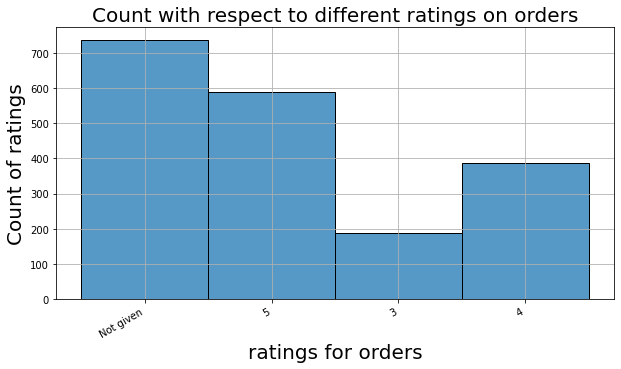

In [11]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,5))

# Below is the histplot used with seaborn library on the X-axis as 'rating' and dataframe 'df'

sns.histplot(data=df,  x='rating', binwidth = 2);

# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('ratings for orders', fontsize=20)
plt.ylabel('Count of ratings', fontsize=20)
plt.title ('Count with respect to different ratings on orders', fontsize=20);
plt.grid()


#### Observations:



1.   736 orders donot have rating and categorized as 'Not given', which is around 39%.
2.   Approximately  31% of orders are having the rating as 5.
3.   Approximately  20% of orders are having the rating as 4.
4.   Approximately  10% of orders are having the rating as 3.



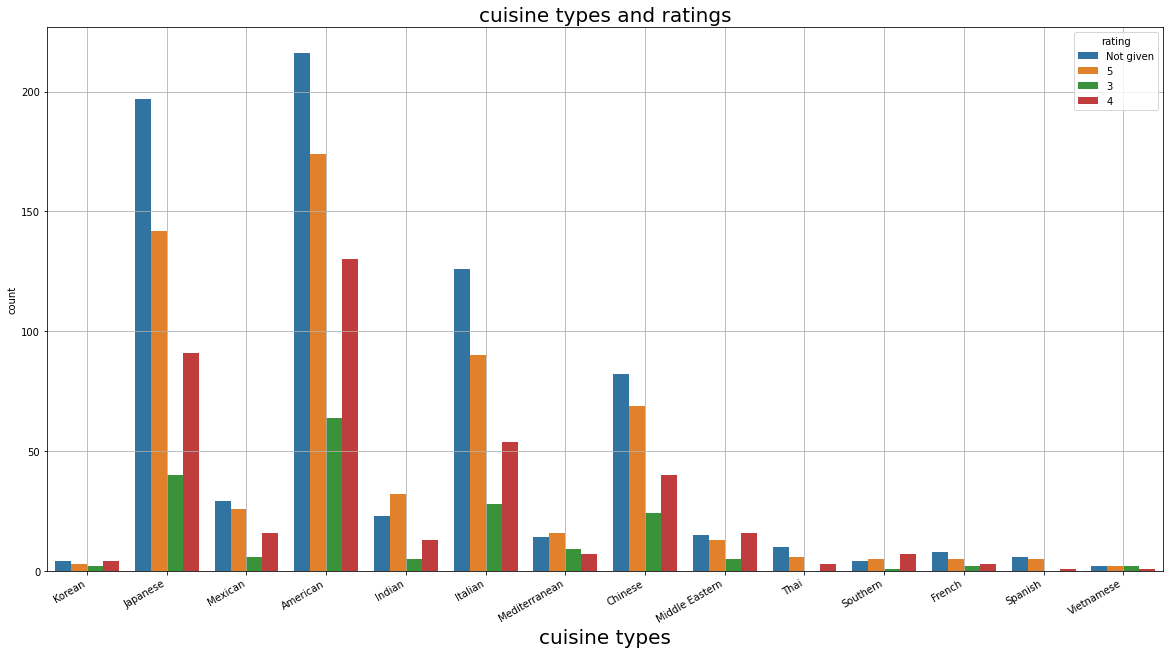

In [12]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(20,10))

# Below is the barplot or countplot used with seaborn library on the X-axis as 'cuisine types' and dataframe 'df'

sns.countplot(data=df,  x='cuisine_type', hue='rating');

# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('cuisine types', fontsize=20)
plt.title ('cuisine types and ratings', fontsize=20);
plt.grid()


####Observations:

1. It is observed that American cuisine has the highest number of orders.
2. American cuisine has highest number of rating 'Not given' followed by Japanese.
3. overall, Vietnamese has the least number of orders 
4. Its is observed that American cuisine is the most preferred with overall highest ratings with 5,4,3.

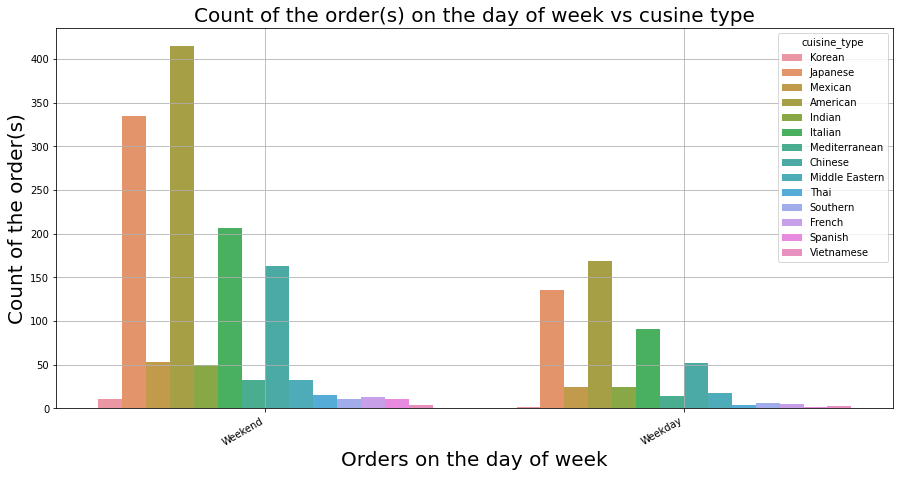

In [ ]:

# import libraries for data manipulation

import pandas as pd
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# Below is the countplot used with seaborn library on the X-axis as 'day_of_the_week' and dataframe 'df'

sns.countplot(data=df, x="day_of_the_week", hue="cuisine_type")

# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Orders on the day of week', fontsize=20)
plt.ylabel('Count of the order(s)', fontsize=20)
plt.title ('Count of the order(s) on the day of week vs cusine type', fontsize=20);
plt.grid()


#### Observations:



1.   'American' is the most preferred cuisine type in weekend, followed by Japanese.
2. 'Amerian' is the most preferred cuisine type in weekday followed by Japanese.



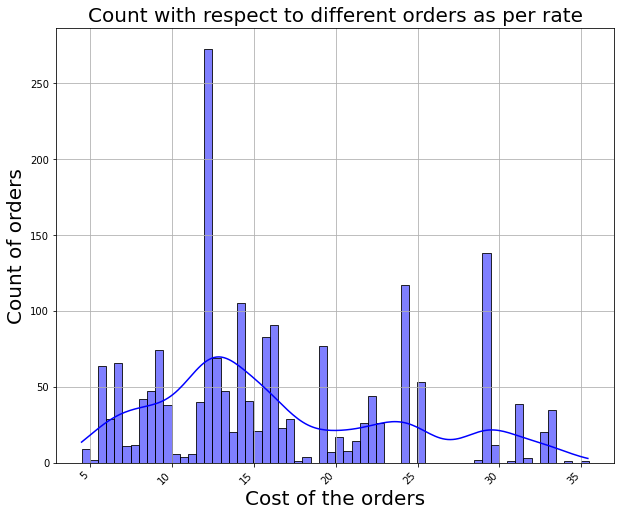

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the histplot used with seaborn library on the X-axis as 'cost_of_the_order' and dataframe 'df'

sns.histplot(data=df,  x='cost_of_the_order',  binwidth=0.5, color='blue', kde=True);

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Cost of the orders', fontsize=20)
plt.ylabel('Count of orders', fontsize=20)
plt.title ('Count with respect to different orders as per rate', fontsize=20);
plt.grid()

#### Observations:

1.   It is observed that the we have maximum number of orders ranging between  10 and 15 dollars.
2.   Median number of orders is mostly at the $14
3.   It is observed the very few orders are above 35 dollars.
4. Here, the mean is slightly greater than the median, which indicates the distribution is positely skewed.

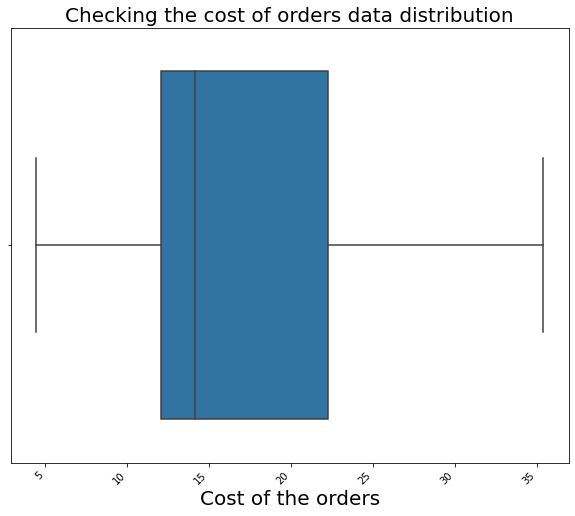

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the boxplot used with seaborn library on the X-axis as 'cost_of_the_order' and dataframe 'df'

sns.boxplot(data=df,  x='cost_of_the_order');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Cost of the orders', fontsize=20)
plt.title ('Checking the cost of orders data distribution', fontsize=20);


#### Observations:

1.   It is observed  the above graph is mostly right skewed .
2.   Median number of orders is mostly at the $14.
3.   It is found that we donot have any outliers in the distribution .



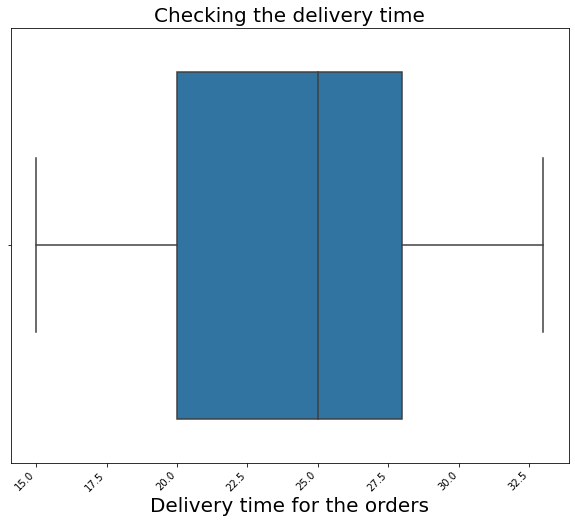

In [ ]:
#Importing pandas and seaborn libraries for data analysis and data visualization(s)

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the Boxplot used with seaborn library on the X-axis as 'delivery_time' and dataframe 'df'

sns.boxplot(data=df,  x='delivery_time');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Delivery time for the orders', fontsize=20)
plt.title ('Checking the delivery time', fontsize=20);

####Observations:

1.   Median time for the delivery of the orders is 25 minutes.
2.   There are no oultliers for the above plotted graph.
3.   It is observed that the graph is mostly left skewed with most of the orders towards left side of the median.



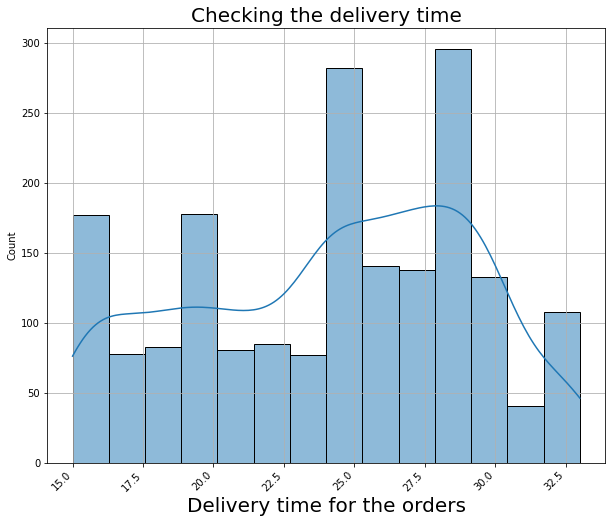

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the Histplot used with seaborn library on the X-axis as 'delivery_time' and dataframe 'df'

sns.histplot(data=df,  x='delivery_time', kde=True);

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Delivery time for the orders', fontsize=20)
plt.title ('Checking the delivery time', fontsize=20);
plt.grid()

####Observations:

1.   Median time for the order is around 25 minutes.
2.   It is observed that the graph is mostly left skewed with most of the orders towards left side of the median.
3. Most of the  orders delivered is between 25 and 30 minutes.





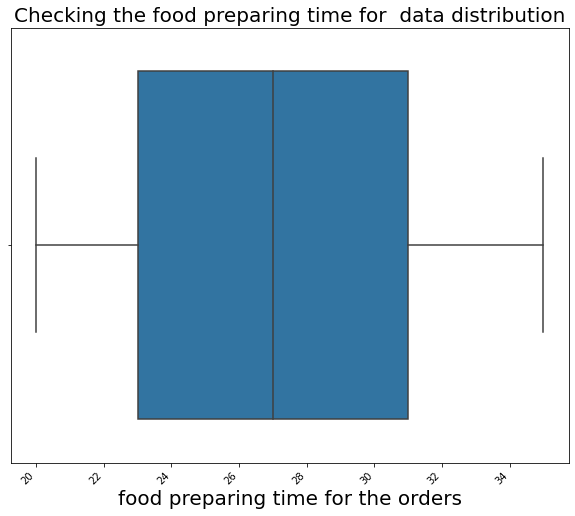

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the Boxplot used with seaborn library on the X-axis as 'food_preparation_time' and dataframe 'df'

sns.boxplot(data=df,  x='food_preparation_time');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('food preparing time for the orders', fontsize=20)
plt.title ('Checking the food preparing time for  data distribution', fontsize=20);

####Observations:

1.   The average time for preparing the food is around 27 minutes.
2.   It is observed there are no whiskers plotted around the graph.
3.   It is observed  the above graph is more normal distributed with no skewness.  



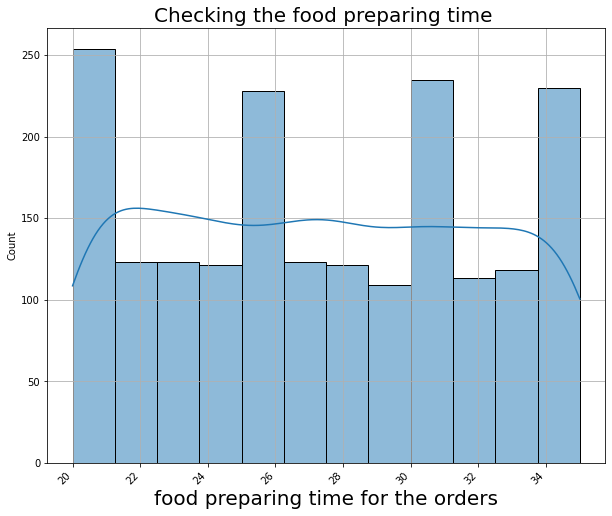

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the histplot used with seaborn library on the X-axis as 'food preparation time' and dataframe 'df'

sns.histplot(data=df,  x='food_preparation_time', kde=True);

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('food preparing time for the orders', fontsize=20)
plt.title ('Checking the food preparing time ', fontsize=20);
plt.grid()

####Observations:

1.   The average time for preparing the food is around 27 minutes.
2.   It is observed the above graph is more normal distributed with no skewness.



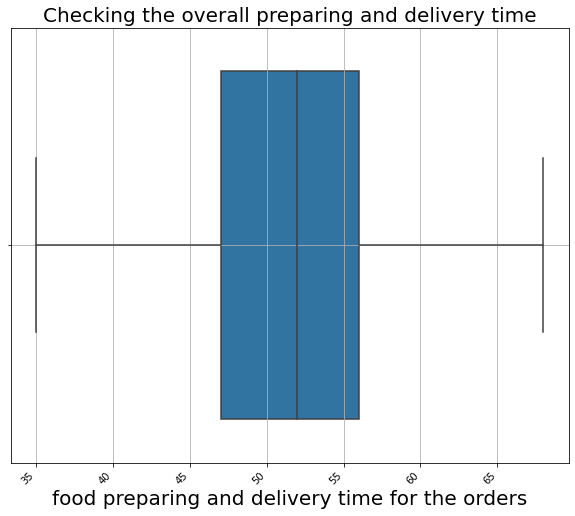

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the boxplot used with seaborn library on the X-axis we have combination of 'food_preparation_time' and 'delivery_time' and to new dataframe column

df['Total_food_preparing_Delivery_time'] = df['food_preparation_time'] + df['delivery_time']

sns.boxplot(data=df,  x='Total_food_preparing_Delivery_time');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('food preparing and delivery time for the orders', fontsize=20)
plt.title ('Checking the overall preparing and delivery time', fontsize=20);
plt.grid()

####Observations:

1. Average median time for food preparation and delivery of order is between 50 to 55 minutes.
2. There are no whiskers for the above plotted graph.
3. It is observed , the above plotted graph has no skewness.
4. Overall food preparation and delivery time is between 35 to 70 minutes.

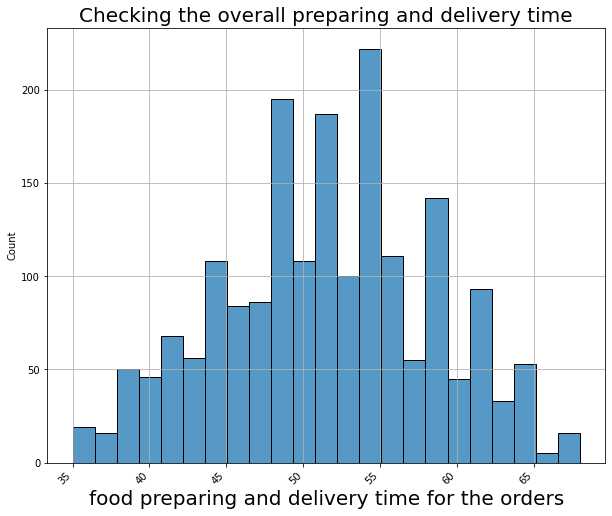

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

# Below is the histplot used with seaborn library on the X-axis we have combination of 'food_preparation_time' and 'delivery_time' and to new dataframe column

df['Total_food_preparing_Delivery_time'] = df['food_preparation_time'] + df['delivery_time']

sns.histplot(data=df,  x='Total_food_preparing_Delivery_time');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('food preparing and delivery time for the orders', fontsize=20)
plt.title ('Checking the overall preparing and delivery time', fontsize=20);
plt.grid()


####Observations:

1.   It is observed that most of the orders take between 50 to 55 minutes to prepare and delivery . 
2.   It is observed that the graph is not skewed and equally distributed.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# Group by the above weekend dataframe and sort with the ascending as values and fetch the highest record with most popular cuisine

total_orders_by_rest = df.groupby(['restaurant_name'])['order_id'].size().sort_values(ascending=False).reset_index().head(5)

# rename the columns in the final dataset
total_orders_by_rest.columns=["restaurant_name","#no_of_orders"]
print (total_orders_by_rest)

             restaurant_name  #no_of_orders
0                Shake Shack            219
1          The Meatball Shop            132
2          Blue Ribbon Sushi            119
3  Blue Ribbon Fried Chicken             96
4                       Parm             68


#### Observations:


1.   Restaurants named "Shake Shack", "The "Meatball Shop", "Blue Ribbon Sushi","Blue Ribbon Fried Chicken", "Parm" are the top 5 restaurants with the  the highest number of orders.






### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below dataframe returns the records only for weekend from entire dataset

df_weekend = df.loc[df['day_of_the_week'] =='Weekend']

# Group by the above weekend dataframe and sort with the ascending as values and fetch the highest record with most popular cuisine

df_weekend_by_cuisine = df_weekend.groupby('cuisine_type').size().sort_values(ascending=False).reset_index().head(1)

# rename the columns in the final dataset

df_weekend_by_cuisine.columns=["cuisine_type","#no_of_orders"]

print (df_weekend_by_cuisine)

  cuisine_type  #no_of_orders
0     American            415


#### Observations:

1.   As per above data, the most popular cuisine in weekends is american with total number of orders as 415.




### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below is the dataframe  to fetch the data for cost_of_orders greater than the 20

cost_order_gt_20 = df[df["cost_of_the_order"]>20].reset_index()

# pct_gt_20 is used to calculate the percentage of cost of orders greater than 20 from entire dataframe

pct_gt_20 = round(len(cost_order_gt_20)/len(df) * 100, 2)

print (pct_gt_20)

29.24


#### Observations:



1.   It is observed that, 29.24% of the entire data has orders cost more than the 20 dollars.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#Importing pandas and seaborn libraries for data analysis and data visualization(s)

# import libraries for data manipulation

import numpy as np
import pandas as pd

print (df['delivery_time'].agg({'mean'}))

mean    24.161749
Name: delivery_time, dtype: float64


#### Observations:


1.   The mean order delivery time is 24.161749 minutes.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# import libraries for data manipulation

import numpy as np
import pandas as pd


# Below is to groupby customer_id, order_id and reset_index on new dataframe and fetch the top 3 rows from the  data

no_of_orders = df.groupby('customer_id')['order_id'].size().sort_values(ascending=False).reset_index().head(3)
no_of_orders.columns = ["customer_id","no_of_orders_per_id"]
print (no_of_orders)


   customer_id  no_of_orders_per_id
0        52832                   13
1        47440                   10
2        83287                    9


#### Observations:

1. It is observed that customer_id 52832 has placed 13 orders, most of them are of cuisine type as Japanese. 
2. It is observed that customer_id 47440 has placed 10 orders ,all of them have cuisine type as American.
3. It is observed that customer_id 83287 has placed 9 orders, most of them are of cuisine type as American and Japanese.   




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; yo

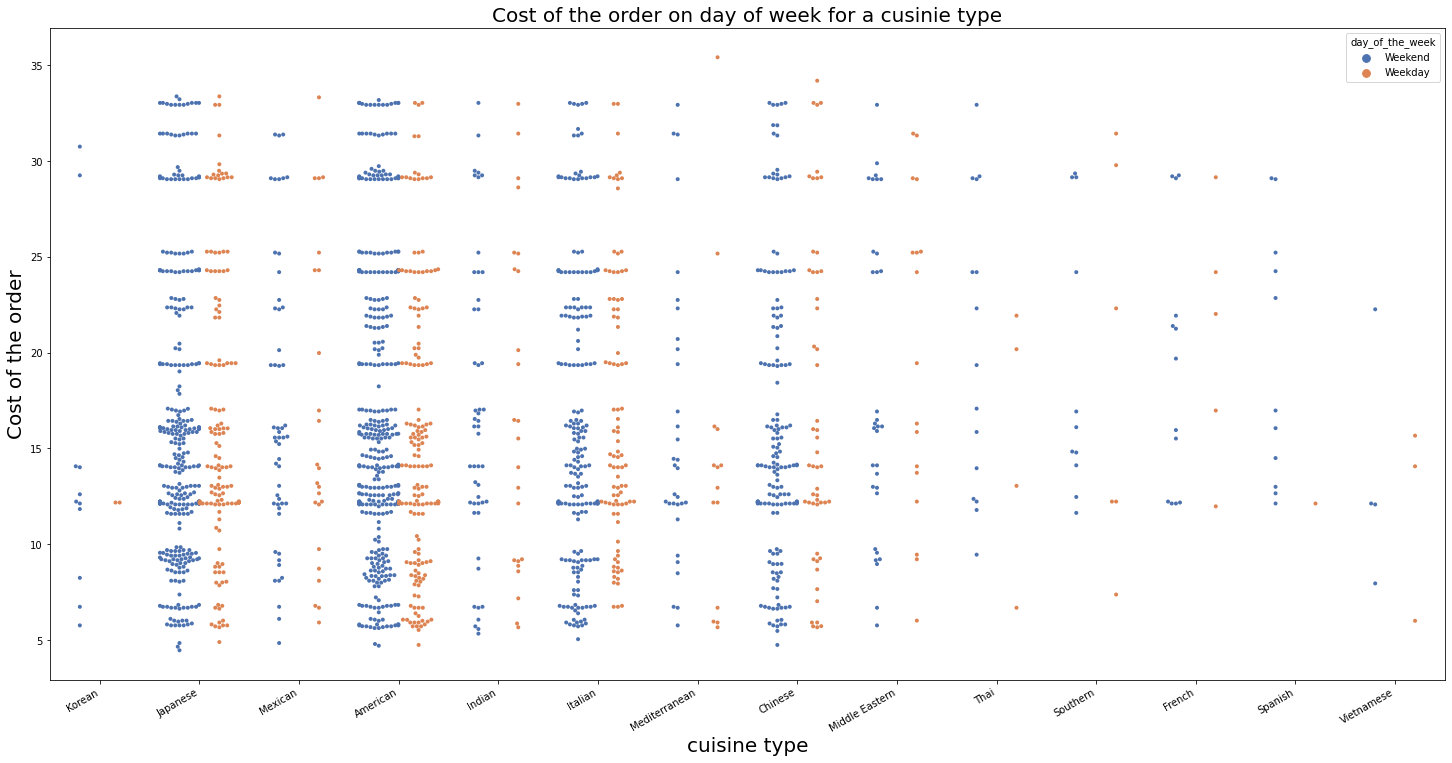

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(25,12))

# Below is the swarmplot used with seaborn library on the X-axis as 'cuisine_type and Y-axis as 'cost_of_the_order' and dataframe 'df'

sns.swarmplot(data=df,  x='cuisine_type', y='cost_of_the_order', dodge=True, palette="deep", size=4,  hue='day_of_the_week');

# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('cuisine type', fontsize=20)
plt.ylabel('Cost of the order', fontsize=20)
plt.title ('Cost of the order on day of week for a cusinie type', fontsize=20);


####Observations:

1.   It is observed that American cuisine has the highest number of orders through out the week.
2.   American cuisine has more orders on Weekend than on Weekday.
3.   Vietnamese has the lowest number of orders through out the week.
4.   Most of the American cuisine orders are between 5 and 20 dollars.
5. Highest cost of the order is mediterranean cuisine on a weekday.



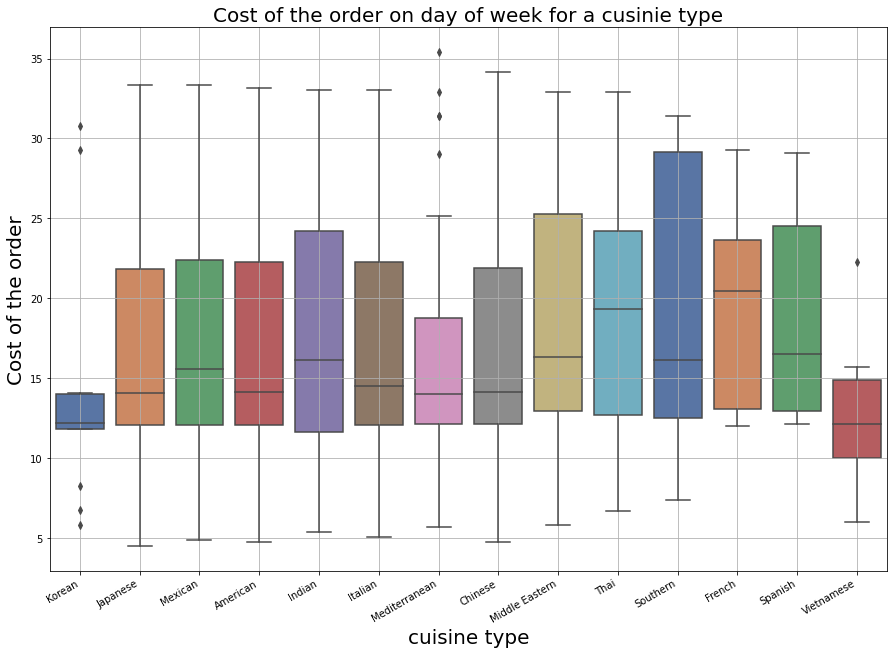

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,10))

# Below is the boxplot used with seaborn library on the X-axis as 'cuisine type'  and Y-axis as 'cost_of_the_order' and  dataframe 'df'

sns.boxplot(data=df,  x='cuisine_type', y='cost_of_the_order',  palette="deep");

# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('cuisine type', fontsize=20)
plt.ylabel('Cost of the order', fontsize=20)
plt.title ('Cost of the order on day of week for a cusinie type', fontsize=20);
plt.grid()


####Observations:

1.   There are few outliers for korean, Mediterranean and Vietnamese orders.
2.   90% of the cuisines have median price between 10 and 20 dollars.
3.   50% of the cuisines have median price below 15 dollars.
4.   All cuisines fall between the least price as 5 and maximum price 35 dollars.



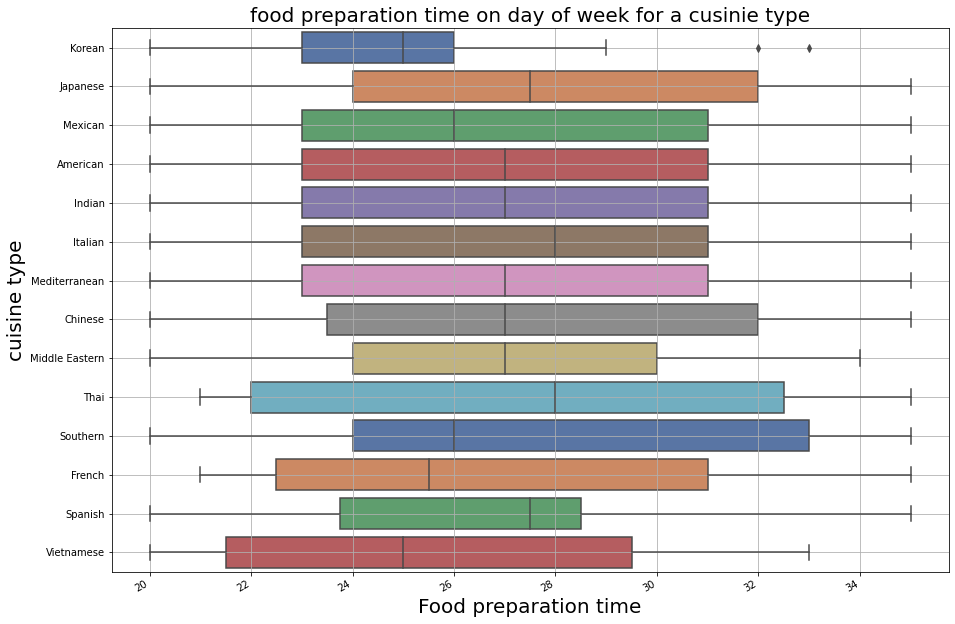

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,10))

# Below is the boxplot used with seaborn library on the X-axis as 'food_preparation_time'  and Y-axis as 'cuisine_type' and  dataframe 'df'

sns.boxplot(data=df,  x='food_preparation_time', y='cuisine_type',  palette="deep");



# xticks is used to rotate the x label

plt.xticks(rotation= 30, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Food preparation time', fontsize=20)
plt.ylabel('cuisine type', fontsize=20)
plt.title ('food preparation time on day of week for a cusinie type', fontsize=20);
plt.grid()

####Observations:

1.  All  cuisine type have median food preparing time between 24 to 28 minutes.
2.  All cuisine take mimimum food preparing time with 20 minutes and maximum of 35 minutes.
3. There are only outliers for korean cuisine which take more than 30 minutes.




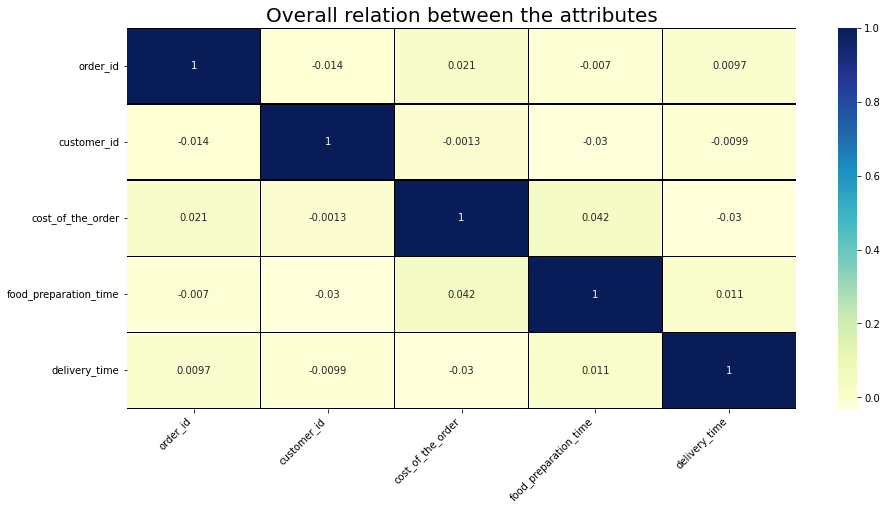

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# Below is the heatmap used with seaborn library on the different numerical/Categorical variables and  dataframe 'df'

sns.heatmap(data=df[['order_id','customer_id','restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week','rating','food_preparation_time','delivery_time']].corr(), 
            annot=True, cmap='YlGnBu', linecolor='Black', linewidths=.5);

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar titles respectively

plt.title ('Overall relation between the attributes', fontsize=20);



####Observations:

1.  It is observed that, above graph donot have any strong co-relation between the variables.



       cuisine_type                        restaurant_name  order_id
113      Vietnamese                   Xe May Sandwich Shop         2
71       Vietnamese                             V-Nam Cafe         4
80             Thai                   Lantern Thai Kitchen         4
75             Thai              Pinto Nouveau Thai Bistro         4
109         Spanish                               DespaÌ±a         2
44          Spanish                               Boqueria         9
87         Southern                             Amy Ruth's         3
32         Southern             Hill Country Fried Chicken        14
23   Middle Eastern                       ilili Restaurant        18
25   Middle Eastern                           Cafe Mogador        18
27          Mexican                            Cafe Habana        16
20          Mexican  Chipotle Mexican Grill $1.99 Delivery        23
51    Mediterranean                       Mamoun's Falafel         7
18    Mediterranean               

<Figure size 1656x720 with 0 Axes>

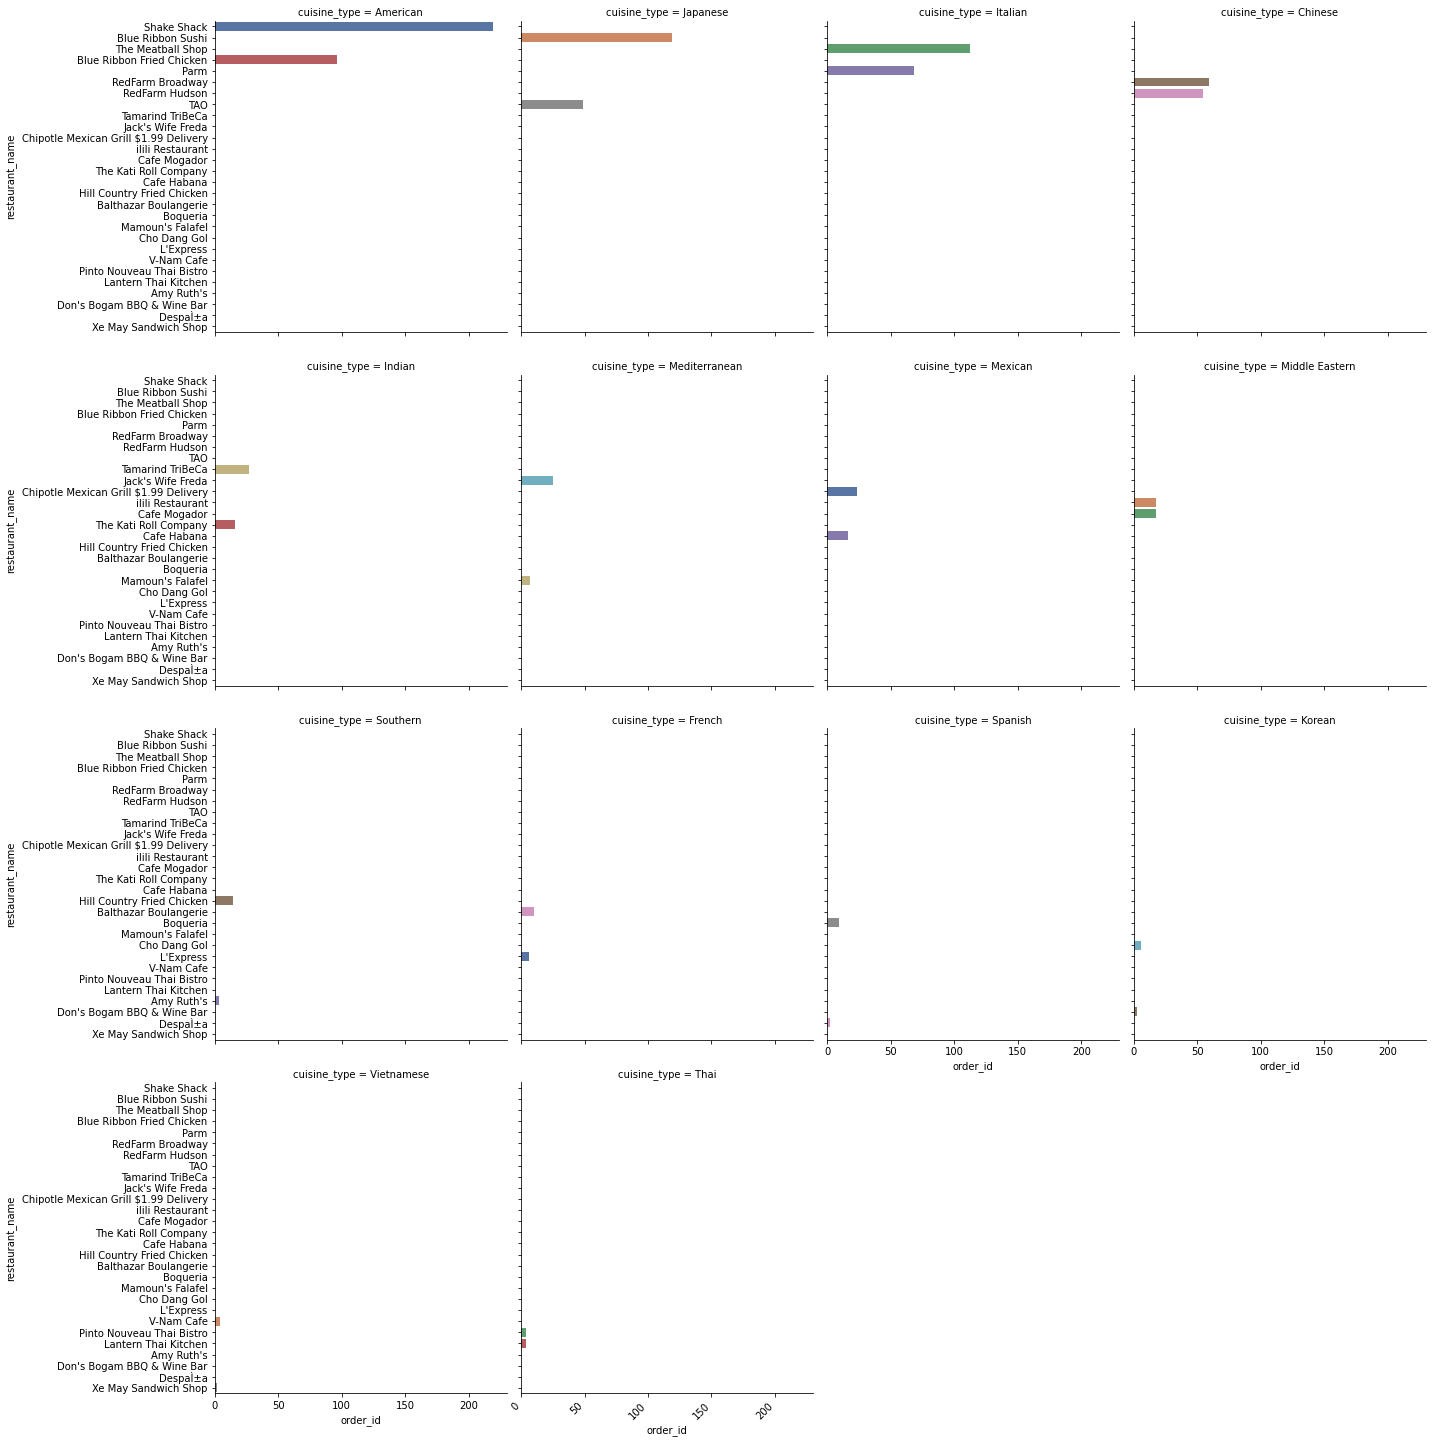

In [ ]:
''' 
Objective :: Find the top 2 restaurants in each cuisine depending on the highest number of orders 
'''
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(23,10));

# Below is the catplot used with seaborn library on the X-axis as total number of orders  and Y-axis as restaurant_name with classiciation of cuisine_type on the  dataframe 'df'

df_top_rstrnt_nms = df.groupby(['cuisine_type','restaurant_name'])['order_id'].size().sort_values(ascending=False).reset_index()
df_top_rstrnt_nms_top_2 = df_top_rstrnt_nms.groupby(['cuisine_type']).head(2)

# Print top 2 order categorized by cuisine type 

print (df_top_rstrnt_nms_top_2.sort_values(by=(['cuisine_type']), ascending=False))

sns.catplot(data=df_top_rstrnt_nms_top_2,  x='order_id', y='restaurant_name', col='cuisine_type', kind='bar', col_wrap=4, palette="deep");

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');


####Observations 

1.   It is observed that "American" cuisine has the highest number of orders and restaurant names  includes  "Blue Ribbon Fried Chicken" and "Shake Shack" .
2. It is observed that "Vietnamese" cuisine has the least number of orders and highest orders from the restaurant(s) includes "V-Nam Cafe" and "Xe May Sandwich Shop".

<Figure size 1368x504 with 0 Axes>

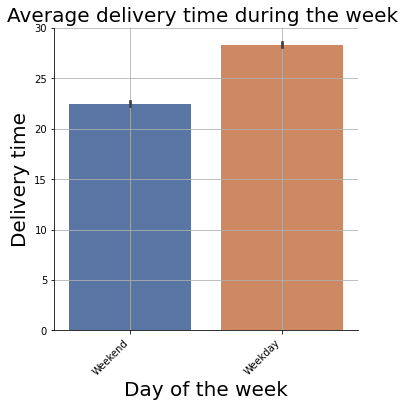

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(19,7));

# Below is the catplot used with seaborn library on the X-axis as day of the week  and Y-axis as delivery time on the  dataframe 'df'

sns.catplot(data=df,  x='day_of_the_week', y='delivery_time',  kind='bar',  palette="deep");

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('Delivery time', fontsize=20)
plt.title ('Average delivery time during the week ', fontsize=20);
plt.grid()


####Observations:

1.   Average delivery time in the weekend is between 20 and 25 minutes.
2.   Average delivery time in the weekday is between 25 and 30 minutes.



<Figure size 1368x504 with 0 Axes>

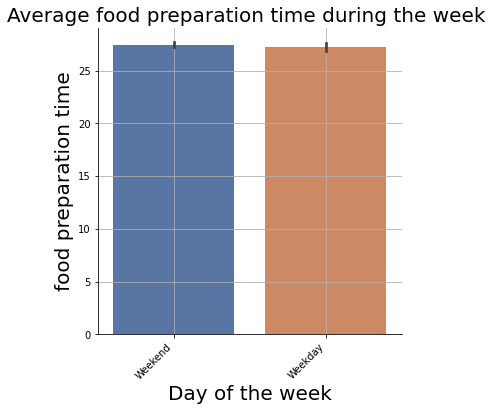

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(19,7));

# Below is the catplot used with seaborn library on the X-axis as day of the week  and Y-axis as food preparation time  on the  dataframe 'df'

sns.catplot(data=df,  x='day_of_the_week', y='food_preparation_time',  kind='bar',  palette="deep");

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('food preparation time', fontsize=20)
plt.title ('Average food preparation time during the week ', fontsize=20);
plt.grid()


####Observations:

1.   Food preparation time during the weekday or weekend is around 25 to 30 minutes.




<Figure size 1368x504 with 0 Axes>

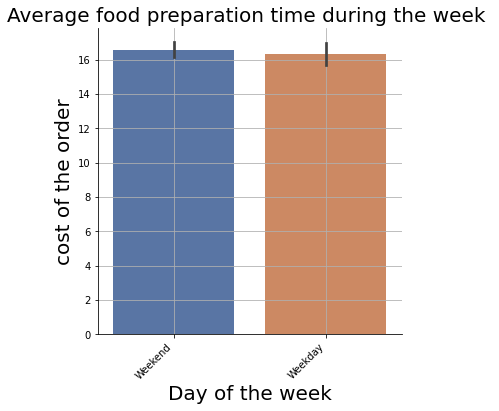

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(19,7));

# Below is the catplot used with seaborn library on the X-axis as day of the week  and Y-axis as cost_of_the_order  on the  dataframe 'df'

sns.catplot(data=df,  x='day_of_the_week', y='cost_of_the_order',  kind='bar',  palette="deep");

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively
plt.xlabel('Day of the week', fontsize=20)
plt.ylabel('cost of the order', fontsize=20)
plt.title ('Average food preparation time during the week ', fontsize=20);
plt.grid()


#####Observations:

1.   Cost of the order in either a weekend or weekday is around 16 dollars.



      cuisine_type  Totalval  Perct_val
0         American       415  29.642857
1         Japanese       335  23.928571
2          Italian       207  14.785714
3          Chinese       163  11.642857
4          Mexican        53   3.785714
5           Indian        49   3.500000
6    Mediterranean        32   2.285714
7   Middle Eastern        32   2.285714
8             Thai        15   1.071429
9           French        13   0.928571
10          Korean        11   0.785714
11        Southern        11   0.785714
12         Spanish        11   0.785714
13      Vietnamese         4   0.285714


<Figure size 1440x360 with 0 Axes>

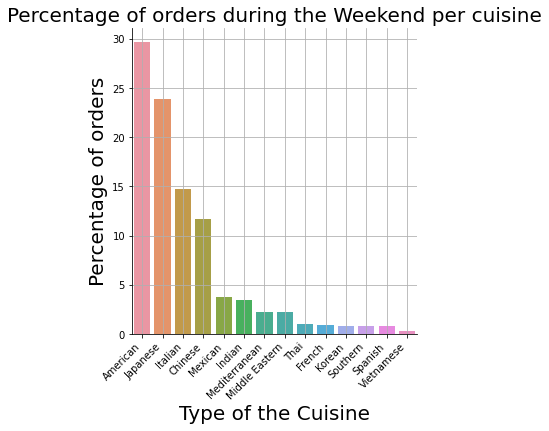

In [ ]:
''' 
Objective :: Get the total percentage of orders placed in each cuisine during the Weekend. 
'''

# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(20,5));

# Below is the dataframe to filter the Weekend data and group by 'restaurant_name','cuisine_type','order_id' and calculate the values

df_weekend_day_of_week = df.loc[df['day_of_the_week'] == 'Weekend'].groupby(['restaurant_name','cuisine_type','order_id']).size().sort_values(ascending=False).reset_index()
df_weekend_day_of_week.columns=['restaurant_name','cuisine_type','order_id','Totalval']
df_weekend_day_of_week_sum = df_weekend_day_of_week.groupby(['cuisine_type'])['Totalval'].sum().sort_values(ascending=False).to_frame().reset_index()
df_weekend_day_of_week_sum['Perct_val'] = df_weekend_day_of_week_sum['Totalval']/len(df_weekend_day_of_week_sum)
print (df_weekend_day_of_week_sum)

sns.catplot(data=df_weekend_day_of_week_sum, x='cuisine_type', y='Perct_val', kind='bar');


plt.xlabel('Type of the Cuisine', fontsize=20)
plt.ylabel('Percentage of orders', fontsize=20)
plt.title('Percentage of orders during the Weekend per cuisine', fontsize=20)

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

plt.grid()


####Observations:

1. It is observed that American cuisine has the highest number of orders with  29%.
2. It is observed that Japanese have the 2nd highest after American with 24%.

      cuisine_type  Totalval  Perct_val
0         American       169  12.071429
1         Japanese       135   9.642857
2          Italian        91   6.500000
3          Chinese        52   3.714286
4           Indian        24   1.714286
5          Mexican        24   1.714286
6   Middle Eastern        17   1.214286
7    Mediterranean        14   1.000000
8         Southern         6   0.428571
9           French         5   0.357143
10            Thai         4   0.285714
11      Vietnamese         3   0.214286
12          Korean         2   0.142857
13         Spanish         1   0.071429


<Figure size 1440x360 with 0 Axes>

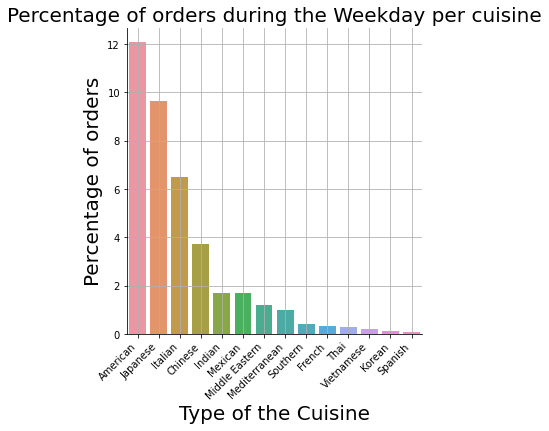

In [ ]:
''' 
Objective :: Get the total percentage of orders placed in each cuisine during the Weekday. 
'''

# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(20,5));

df_weekend_day_of_week = df.loc[df['day_of_the_week'] == 'Weekday'].groupby(['restaurant_name','cuisine_type','order_id']).size().sort_values(ascending=False).reset_index()
df_weekend_day_of_week.columns=['restaurant_name','cuisine_type','order_id','Totalval']
df_weekend_day_of_week_sum = df_weekend_day_of_week.groupby(['cuisine_type'])['Totalval'].sum().sort_values(ascending=False).to_frame().reset_index()
df_weekend_day_of_week_sum['Perct_val'] = df_weekend_day_of_week_sum['Totalval']/len(df_weekend_day_of_week_sum)
print (df_weekend_day_of_week_sum)

sns.catplot(data=df_weekend_day_of_week_sum, x='cuisine_type', y='Perct_val', kind='bar');

# xticks is used to rotate the x label
plt.xlabel('Type of the Cuisine', fontsize=20)
plt.ylabel('Percentage of orders', fontsize=20)
plt.title('Percentage of orders during the Weekday per cuisine', fontsize=20)
plt.xticks(rotation= 45, ha='right');

plt.grid()


####Observations #

1.   It is observed that American cuisine has the highest number of orders with 12% on Weekday.
2.   It is observed that Spanish has the least number of orders with less than 1% of total orders on Weekday.



               restaurant_name day_of_the_week  cost_of_the_order
209                Shake Shack         Weekend            2341.25
236          The Meatball Shop         Weekend            1559.73
35           Blue Ribbon Sushi         Weekend            1326.58
33   Blue Ribbon Fried Chicken         Weekend            1311.13
188             RedFarm Hudson         Weekend             750.51
               restaurant_name day_of_the_week  cost_of_the_order
208                Shake Shack         Weekday            1238.28
235          The Meatball Shop         Weekday             585.48
34           Blue Ribbon Sushi         Weekday             577.37
168                       Parm         Weekday             463.18
32   Blue Ribbon Fried Chicken         Weekday             351.16


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

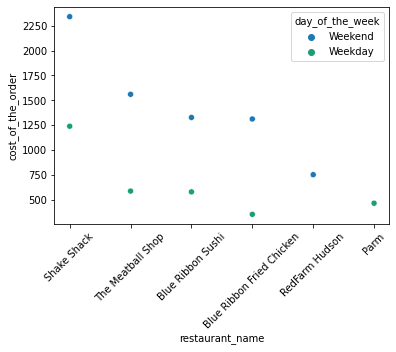

In [ ]:
''' 
Objective :: Get the Top 5 total revenue of orders placed in each restaurant during the Weekday and Weekend. 
'''

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

top_5_rstnt_nm_by_rvn = df.groupby(['restaurant_name','day_of_the_week'])['cost_of_the_order'].sum().reset_index().sort_values(by=(['cost_of_the_order','restaurant_name']),ascending=False)
#x.columns=['restaurant_name','counts']

top_5_rstnt_nm_by_rvn_wknd = top_5_rstnt_nm_by_rvn[top_5_rstnt_nm_by_rvn['day_of_the_week'] == 'Weekend']
top_5_rstnt_nm_by_rvn_wknd = top_5_rstnt_nm_by_rvn_wknd.head(5)
print (top_5_rstnt_nm_by_rvn_wknd)

top_5_rstnt_nm_by_rvn_wkdy = top_5_rstnt_nm_by_rvn[top_5_rstnt_nm_by_rvn['day_of_the_week'] == 'Weekday']
top_5_rstnt_nm_by_rvn_wkdy = top_5_rstnt_nm_by_rvn_wkdy.head(5)
print (top_5_rstnt_nm_by_rvn_wkdy)

sns.scatterplot(data=top_5_rstnt_nm_by_rvn_wknd, x='restaurant_name',y='cost_of_the_order', hue='day_of_the_week')
plt.xticks(rotation=45)

sns.scatterplot(data=top_5_rstnt_nm_by_rvn_wkdy, x='restaurant_name',y='cost_of_the_order', hue='day_of_the_week',palette='Dark2')
plt.xticks(rotation=45)


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:

# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below dataframe filters the data which has rating given as 'Not given'

df_filter_notgiven = df.loc[df['rating'] != ('Not given') ].reset_index()
#print (df_filter_notgiven)

# Below is the code to group by restaurant_name and rating and calculate the count and reset the index to dataframe

df_rating_count_rstrnt_nm = df_filter_notgiven.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

# From the above dataframe only consider the rating which is greater than 50

df_rating_count_rstrnt_nm = df_rating_count_rstrnt_nm[df_rating_count_rstrnt_nm['rating'] > 50]
#print (df_rating_count_rstrnt_nm)

#For the remaining dataset from above dataframe, only consider the mean on the restaurant_name and rating 

df_rating_avgs_rstrnt_nm = df_rating_count_rstrnt_nm.groupby(['restaurant_name','rating']).mean().sort_values(by=['restaurant_name','rating'], ascending=False).reset_index() 

#From the above new dataframe only consider the rating which is greater than 4

df_rating_avgs_rstrnt_nm = df_rating_avgs_rstrnt_nm[df_rating_avgs_rstrnt_nm['rating'] > 4]

print (df_rating_avgs_rstrnt_nm['restaurant_name'])



0            The Meatball Shop
1                  Shake Shack
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object


#### Observations:



1.   restaurants fulfilling the promotional offer with specific criteria on the average and
count are 'The Meatball Shop', 'Shake Shack', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken'.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below function calculates the logic for the orders with different percentage values 


def fetch_condition(row):
   val = 0
   # If the cost of the order is greater than $20, calculate 25% on orders 
   if row['cost_of_the_order'] > 20:
     val =  row['cost_of_the_order'] + row['cost_of_the_order'] * 0.25
   # If the cost of the order is greater than $5, calculate  15% on orders   
   elif ((row['cost_of_the_order'] > 5) & (row['cost_of_the_order'] <= 20)):
     val =  row['cost_of_the_order'] + row['cost_of_the_order'] * 0.15  
   else:
     val =  row['cost_of_the_order']
   return val

# Apply the return value from the above function to dataframe column 'pctg_calc_of_orders' 

df['pctg_calc_of_orders'] = df.apply(fetch_condition, axis=1)

# Calculate the difference between the actual cost_of_the_order  and calculated pctg_calc_of_orders columns 

final_net_vals = df['pctg_calc_of_orders'] - df['cost_of_the_order']

print (final_net_vals.sum())


6166.303


#### Observations:



1.   The total net revenue generated by the company across all orders is 6166.303




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# Below  calculates the logic for the addition of the food_preparation_time and delivery time into a new column total_time_for_prep_dlvry

df['total_time_for_prep_dlvry'] = df['food_preparation_time'] + df['delivery_time']

# Below only fetches the data which has condition with orders greater than 60 minutes

delivery_time_gt_60 = df[df['total_time_for_prep_dlvry'] > 60]

'''
Below calculates the percentage of the number of records from delivery_time_gt_60 and total number of records/rows in dataset
and calculates the percentage(s)
'''

pctg_orders_gt_60 = round(len(delivery_time_gt_60)/len(df) * 100, 2)
print (pctg_orders_gt_60)


10.54


#### Observations:



1.   The total percentage of orders which took more than 60 minutes to have food prepared and delivered is around 10.54% 




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# Calculate the mean for the delivery time for day of the week as Weekend

delivery_time_wknds =   df.loc[df['day_of_the_week'] == 'Weekend','delivery_time'].mean()

print ('Total mean delivery time  during weekends is', round(delivery_time_wknds,2))

# Calculate the mean for the delivery time for the day of the week as weekday

delivery_time_wkdy = df.loc[df['day_of_the_week'] == 'Weekday','delivery_time'].mean()

print ('Total mean delivery time  during Weekday is', round(delivery_time_wkdy,2))

# Calculate the difference between the weekday and weekend 

delivery_time_mean_diff = round(delivery_time_wkdy,2) - round(delivery_time_wknds,2)

print ('Total mean delivery time vary during weekends and weekday is', round(delivery_time_mean_diff,2))


Total mean delivery time  during weekends is 22.47
Total mean delivery time  during Weekday is 28.34
Total mean delivery time vary during weekends and weekday is 5.87


#### Observations:



1.   Total mean delivery time  during weekends is 22.47
2.   Total mean delivery time  during Weekday is 28.34
3.   Total mean delivery time vary during weekends and weekday is 5.87
4.   It is ideal that weekday delivery time is more than the weekend delivery time.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

---


*  'American' cuisine is highly popular either on weekday or weekends.
*  Restaurant name 'Shake Shack' from 'American' cuisine has the highest number of orders on Weekend and Weekday.
*  Restaurant name 'The Meatball Shop' from 'Italian' cuisine has the 2nd highest number of orders on Weekday.
*  Total number of orders on Weekend are 1351 orders which are 71% of total and Weekday are 547 orders which are 39% of total.
*  People prefer to order food from restaurant on Weekend as compared to Weekday.
*  American cuisine has highest 12% of total orders on Weekday .
*  American cuisine has highest 29% of total orders on Weekend .
*  It is observed that Spanish and Vietnamese has the least number of orders with less than 1% of total orders on Weekday/Weekend.
*  Cost of the order in either a weekend or weekday is around 16 dollars.
*  It is observed, even if the demand for orders is high in weekend , food preparation time during the weekday or weekend is around 25 to 30 minutes.
* Average delivery time in the Weekend is between 20 and 25 minutes.
* On a interesting observation, Average delivery time in the weekday is between 25 and 30 minutes which is more compared to the Weekend.
* 38.7% of orders donot have ratings which is a bit high and need to understand the reason for the same.
* Total Median time to prepare and deliver food is between 50 and 55 Minutes.
* American cuisine has the highest number of unrated orders (Not given) for 216 followed by Japanese for 197 orders. 

### Recommendations:

*  There is 42% difference between overall orders between Weekend and Weekday, need to understand how to increase the sales on Weekday.
*  There are around  736 orders which customers have not given rating i.e around 38.7% of the total orders, need to check why and what best offer can be given to have all customer provide ratings.
*  Delivery time on Weekday is more than Weekend , need to do more analysis and understand what is causing the delivery time delays in Weekdays.
*  Spanish and Vietnamese orders are low during the Weekdays and Weekends , need to analyze what is causing the low orders in order to increase sales (either the lack of items on menu, density of population preferring these cuisines is low ).
*  Inspite of less orders on Weekday, it is observed that food preparation time is same time as Weekend, need to understand what exactly is the reason and understand further.

---